In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('task_prep.csv', sep=';')
df

,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,-0.372171,1.755587,3.748009,3,3
1,13.225950,3.600102,0.130985,0.053575,-1.946621,1.371272,3.469659,3,1
2,14.603376,5.084047,-0.004651,-0.036299,-1.097486,1.448015,3.855939,3,1
3,26.149905,3.025501,0.229740,0.204591,1.326652,1.937680,2.362421,3,3
4,19.810630,5.020400,-0.011347,-0.028780,-1.248827,1.522902,3.278624,4,3
...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,-1.088837,1.397004,4.758199,4,1
7156,25.363705,4.881059,0.038720,0.054397,0.897137,2.025810,1.823892,4,3
7157,11.160720,5.019859,0.053864,-0.102337,1.603054,2.150058,2.422193,4,3
7158,17.140020,9.269037,0.059911,-0.004299,-1.028902,1.433648,3.715392,4,3


In [3]:
# Провели загрузку наших заранее подготовленных данных с удаленными столбцами.

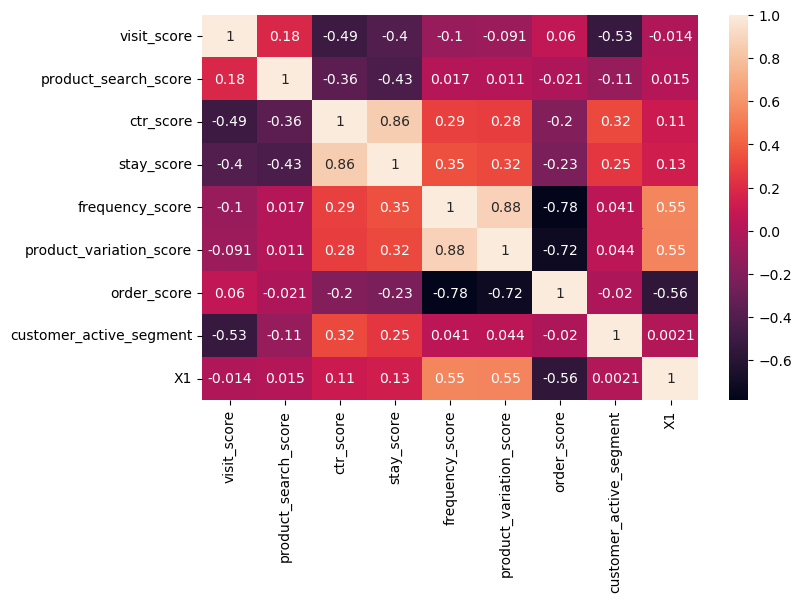

In [4]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, annot=True)
plt.show()

In [5]:
# Объясняемой переменной в данной модели будет параметр order_score. По итогам корреляционной матрицы мы видим, 
# что наибольшая связь зависимой переменой с фактором frequency_score, также значительное влияние на У имеет 
# переменная product_variation_score, так как оба параметра имеют самые высокие коэффициенты корреляции. Следует
# заметить, что эти переменные имеют отрицательную корреляцию с order_score, поэтому можем говорить об обратной
# зависимости. 
# Наименее влиятельной оказалась переменная customer_active_segment. В дальнейшем, скорее всего, этот параметр 
# не будет включен в построение различных видов регрессии.

In [6]:
X = df.iloc[:, [0,1,2,3,4,5,7,8]]
y = df['order_score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [7]:
# Simple Linear Regression

In [8]:
f1 = ['frequency_score']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

(array([-0.66626556]), 2.9461853411452497)

In [9]:
# Для построения линейной регрессии я взяла самый весомый параметр, а именно frequency_score, так как он имел 
# наибольший коэффициент корреляции с зависимой перерменной У. 
# Коэффициент при переменой составляет -0,666. Его отрицательное значение, как и коэффициент корреляции,
# указывает на обратную зависимость переменной и У. Также он говорит нам о том, что при уменьшении значения 
# переменной на 1 у.е., зависимая переменная будет увеличиваться на 0,666 у.е., и наоборот.
# Свободный член вмещает в себя все те факторы, которые не были учтены при построении модели но имеют некое 
# влияние на У. Как видим, он положительный и значительно больше коэффициента при переменной. 

In [10]:
y_pred = sr.predict(X_test[f1])

sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.617, 0.602)

In [11]:
# Исходя из значения коэффициента детерминации можем сказать о том, что выбраная переменная объясняет У на 60%.
# Это не самый лучший результат, но также является нормальным показателем. По нему можно сделать вывод о том,
# что помимо данного параметра существуют и другие, неучтенные в модели, которые также имеют свое воздействие
# на зависимую переменную.

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_train, sr.predict(X_train[f1]))), sqrt(mean_squared_error(y_test, y_pred))

(0.6362196977222747, 0.6301416766527282)

In [13]:
# Как видим по среднеквадратическим ошибкам, данная линейна модель не переобучена. Это хороший показатель.

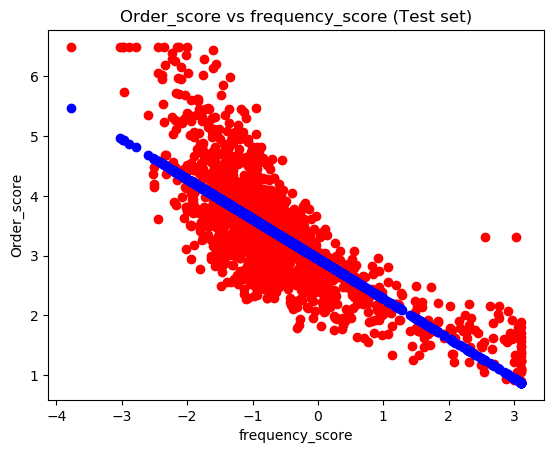

In [14]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], sr.predict(X_test[f1]), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [15]:
# Как видим, предсказанные данные не очень хорошо демонстрируют характер изгиба реальных данных.
# В верхней части графика виден относительно сильный разброс.
# Делаем вывод, что линейная модель недостаточно точно описывает наши данные.
# Оценив визуально модель, можно сделать предположение о том, что она по своей форме на графике 
# напоминает полиномиальную модель. В дальнейшем мы проверим это предположение.

In [16]:
# Multiple Linear Regression

In [17]:
# !pip install statsmodels

In [18]:
mr = LinearRegression().fit(X_train, y_train)

mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(4)

(0.643, 0.6293)

In [19]:
# Во множественной регрессии уровень объясненности У выше, то есть качетво модели немного лучше линейной.
# Это также наблюдается и в тестовой выборке.

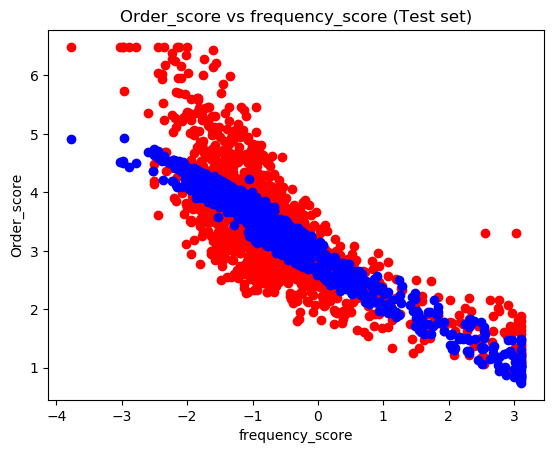

In [20]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], mr.predict(X_test), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [21]:
# На графике тоже видно некоторое улучшение предсказанных данных, их диапазон стал шире. Таким образом меньше 
# отклонение реальных данных от прогнозных значений. Но все равно явно видны некие неточности, а именно в верхнем
# левом углу координатной плоскости. Посмотрим, что нам покажут следующие модели.

In [22]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            order_score   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1290.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:49:10   Log-Likelihood:                -5332.3
No. Observations:                5728   AIC:                         1.068e+04
Df Residuals:                    5719   BIC:                         1.074e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.8811      0.112     34.683      0.000       3.662       4.100
visit_score                 0.0007      0.001      0.436      0.663      -0.002       0.004
product_search_score        0.0066      0.005      1.257      0.209      -0.004       0.017
ctr_score                  -0.0443      0.093     -0.476      0.634      -0.227       0.138
stay_score                  0.1096      0.035      3.127      0.002       0.041       0.178
frequency_score            -0.5158      0.014    -35.658      0.000      -0.544      -0.487
product_variation_score    -0.3620      0.052     -6.991      0.000      -0.463      -0.260
customer_active_segment     0.0121      0.012      1.006      0.315      -0.011       0.036
X1                         -0.1326      0.008    -17.200      0.000      -0.148      -0.117
==============================================================================
Omnibus:                      443.786   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.445
Skew:                           0.654   Prob(JB):                    1.68e-133
Kurtosis:                       3.922   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Посмотрев на коэффициенты и Р-значения, можем определить наиболее значимый фактор для модели 
# и, соответствено, наименее весомый. Таким образом наиболее значимым остается все тот же frequency_score,
# так как Р-значение не превишает уровня значимости а коэффициент при этом факторе самый большой.
# Наиболее незначимыми параметрами являются visit_score и ctr_score, так как у них имеется самый большой 
# показатель Р статистики и крайне маленькие коэффициенты. Также не несет особой ценности 
# customer_active_segment, потому что коэффициент один из самых низких и большое Р-значение.
# Таким образом, в дальнейшем нам не имеет смысла использовать в модели эти параметры.

In [24]:
# Recursive feature elimination

In [25]:
# Для построения модели на основе рекурсивного устранения признаков будем драть 3 самых весомых признака.
# Такое решение было принято потому, что в ходе проведенных экспериментов качество модели при 4-х и 3-х 
# параметрах почти не имело значительных отличий. Следовательно, нет смысла усложнять модель дополнительным 
# параметром, так как он не дает должных результатов. Тем более, что параметр stay_score (имеет наибольшее 
# р-значение среди 4-х наиболее значимых х) имел в построенной модели самый маленький и совсем незначительный
# по сравнению с остальными коэффициент. Можно говорить о том, что для отбора параметров был взят уровень
# значимости равный примерно 0.0001.

In [26]:
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3)
selector = selector.fit(X, y)

selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_selection/rfe.py:167: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  support_ = np.ones(n_features, dtype=np.

In [27]:
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

mr_rfe.coef_, mr_rfe.intercept_

(array([-0.50358584, -0.34958915, -0.13515016]), 3.9757465689071907)

In [28]:
# Итак, построив модель, мы получили коэффициенты при каждом параметре. Как видно по их значениям, самое
# большое воздействие на зависимую переменную имеет 1-й фактор данной модели, а это frequency_score.

In [29]:
y_pred = mr_rfe.predict(X_test[f_lm])

mr_rfe.score(X_train[f_lm], y_train).round(3), mr_rfe.score(X_test[f_lm], y_test).round(4)

(0.642, 0.6285)

In [30]:
# Получаем такой же коэф детерминации, как и в множественной линейной регрессии, и это логично,
# так как мы на данном этапе просто автоматизировали построение множественной регрессии.

In [31]:
sqrt(mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]))), sqrt(mean_squared_error(y_test, y_pred))

(0.6151876902112101, 0.6085352957656602)

In [32]:
# Если сравнивать полученные среднеквадратические показатели с простой линейной регрессией, то видим 
# улучшение модели, потому что ошибка как в обучающей, так и в тестовой выборке стала меньше. 

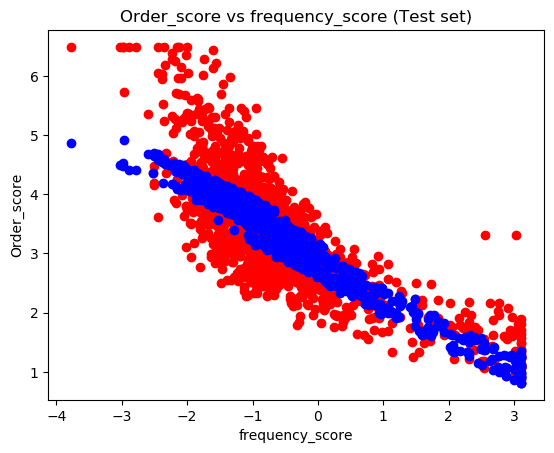

In [33]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], mr_rfe.predict(X_test[f_lm]), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [34]:
# График похож на результат множественной линейной регрессии.

In [35]:
# Backward Elimination

In [36]:
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.0001
X_Modeled = backwardElimination(X_train, y_train, SL)

In [37]:
mr_be = LinearRegression().fit(X_Modeled, y_train)

mr_be.score(X_Modeled, y_train).round(3)

0.643

In [38]:
# Коэффициент детерминации при построении модели обратным устранением незначимых факторов дал такие же
# результаты, как и во множественной регрессии. Получается, все построено правильно.

In [39]:
# Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

pr.coef_, pr.intercept_

(array([-7.38811390e-16, -1.61408538e-02,  2.23142741e-02, -8.41547050e-02,
        -2.53091460e-02, -1.10177710e+00,  1.50661734e-01, -1.98593061e-01,
        -4.50257356e-01,  1.09165519e-04,  3.65101809e-05, -5.30249052e-04,
         4.19966764e-03,  1.76621810e-04, -1.74621131e-03,  4.35563180e-03,
        -5.35765792e-05,  6.64008556e-04, -6.90369542e-02,  1.56401839e-02,
         1.53220875e-03, -4.29851667e-02,  4.45763736e-03,  1.01538168e-02,
        -1.85085597e-01,  9.42194533e-02,  5.75563835e-02,  3.64030479e-01,
         9.33954957e-02, -1.71056221e-01,  1.10047860e-02, -1.47612511e-02,
        -2.15589301e-01, -1.88671973e-02,  9.43603050e-02,  4.56053379e-02,
         3.28431477e-01,  6.15220918e-03, -1.60259857e-02, -1.11606997e-01,
        -3.55715550e-02,  2.09437551e-03,  2.02344054e-02,  6.03298600e-03,
         4.76605755e-02]),
 4.2921461055827805)

In [41]:
y_pred = pr.predict(X_test_p)

pr.score(X_train_p, y_train).round(3)

0.696

In [42]:
# По коэф детерминайции понятно, что качетсво полиномиальной модели является лучше предыдущих. 

In [43]:
sqrt(mean_squared_error(y_train, pr.predict(X_train_p))), sqrt(mean_squared_error(y_test, y_pred))

(0.566764036659837, 0.561795834080422)

In [44]:
# Также видем очень хорошие результаты RMSE, Что тоже подтвержает хорошее качество модели.
# Сейчас посмотрим результаты на графике.

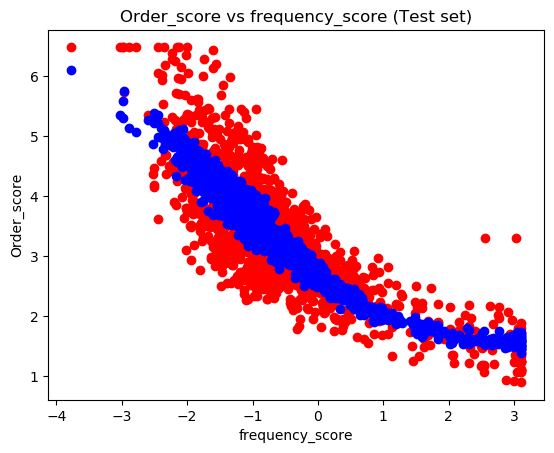

In [45]:
plt.scatter(X_test['frequency_score'], y_test, color = 'red')
plt.plot(X_test['frequency_score'], pr.predict(X_test_p), 'bo')
plt.title('Order_score vs frequency_score (Test set)')
plt.xlabel('frequency_score')
plt.ylabel('Order_score')
plt.show()

In [46]:
# Как и предполагалось ранее, полиномиальная модель наилучшим образом, среди всех представленных здесь, описывает наши данные.

In [47]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()